https://www.kaggle.com/loveall/clicks-conversion-tracking

The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

## EDA
Lets first explore the dataset. Initial impression is it is very small

In [1]:
import pandas as pd

In [2]:
pd.__version__

'0.23.4'

In [3]:
ls

EDA.ipynb  KAG_conversion_data.csv  README.md


In [4]:
df = pd.read_csv('KAG_conversion_data.csv')

In [5]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [6]:
rows = df.shape[0]
rows

1143

In [7]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


### Gender

In [8]:
df['gender'].describe()

count     1143
unique       2
top          M
freq       592
Name: gender, dtype: object

In [9]:
pct_male = int(100*df['gender'][df['gender'] == 'M'].count()/df['gender'].count())
pct_male

51

Pretty evenly balanced male/female

### Spend

In [10]:
df['Spent'].hist(bins=50);

large number of zero spend. How about higher spends?

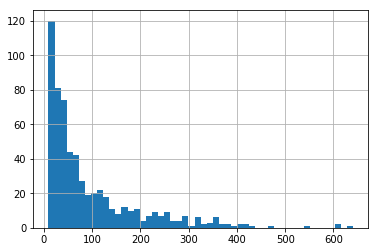

In [11]:
df['Spent'][df['Spent'] > 10].hist(bins=50);

### Unique ads
All adds have unique ad_id..

In [12]:
unique_ads = len(df['ad_id'].unique())
unique_ads

1143

## fb_campaign_id

In [13]:
unique_fb = len(df['fb_campaign_id'].unique())
unique_fb

691

Many campaigns, how many entries?

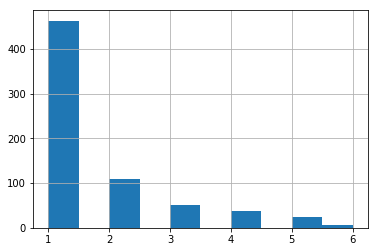

In [14]:
df.groupby('fb_campaign_id').count()['age'].hist();

Most campaigns have a single entry only

## xyzcampaignid
Company campaign id

In [15]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

OK so only 3 campaigns by company

In [16]:
df.groupby('xyz_campaign_id').count()['age']#.hist();

xyz_campaign_id
916      54
936     464
1178    625
Name: age, dtype: int64

Company total spend by campaign (put in its own dataframe for results)

In [17]:
df_xyz_campaign = df.groupby('xyz_campaign_id').sum()['Spent']
df_xyz_campaign = df_xyz_campaign.to_frame()
df_xyz_campaign

,Spent
xyz_campaign_id,
916,149.710001
936,2893.369999
1178,55662.149959


Get number of ads

In [18]:
df_xyz_campaign = df_xyz_campaign.join(df.groupby('xyz_campaign_id').count()['age'])

Mean Conversions by campaign

In [19]:
df_xyz_campaign = df_xyz_campaign.join(df.groupby('xyz_campaign_id').mean()['Total_Conversion'])

In [20]:
df_xyz_campaign = df_xyz_campaign.rename(columns={"Spent": "total_spend", "age": "number_of_ads", "Total_Conversion":"mean_conversion"})

In [21]:
df_xyz_campaign['spend_per_ad'] = df_xyz_campaign['total_spend']/df_xyz_campaign['number_of_ads']

In [22]:
df_xyz_campaign

,total_spend,number_of_ads,mean_conversion,spend_per_ad
xyz_campaign_id,,,,
916,149.710001,54,1.074074,2.772407
936,2893.369999,464,1.157328,6.235711
1178,55662.149959,625,4.270400,89.059440


In [23]:
df_xyz_campaign['ROI'] = df_xyz_campaign['mean_conversion']/df_xyz_campaign['spend_per_ad']
df_xyz_campaign

,total_spend,number_of_ads,mean_conversion,spend_per_ad,ROI
xyz_campaign_id,,,,,
916,149.710001,54,1.074074,2.772407,0.387416
936,2893.369999,464,1.157328,6.235711,0.185597
1178,55662.149959,625,4.270400,89.059440,0.047950


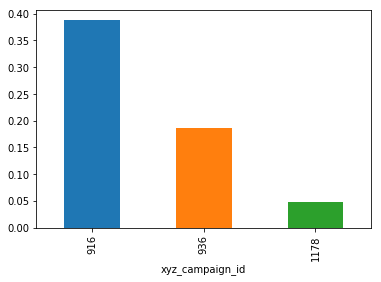

In [24]:
df_xyz_campaign['ROI'].plot.bar();

Campaign 916 was most successful from ROI but ran limited number of ads

## age

In [25]:
ages = df['age'].unique()
print(ages)

['30-34' '35-39' '40-44' '45-49']


In [26]:
df.groupby('age').count()['ad_id']

age
30-34    426
35-39    248
40-44    210
45-49    259
Name: ad_id, dtype: int64

More under 40s than over